
# Project work on Intelligent system
# Comparison between DeepNNs for Transprecision computing (part 3) 
#### Enrico Damini A.Y. 2017/18
# _
### Architecture: DeCNN
### Precision: float32
### Labels: y_i-th 

# Loading data

In [1]:
import pandas as pd

iterations = 3
path = "/Users/enricodamini/Desktop/data_iter"+str(iterations)+"/OpPlus.h5"
data = pd.read_hdf(path)
data.head()

,type,iter,in0,in1,y_0,y_1,y_2,y_3,y_4,y_5,...,e_55,e_56,e_57,e_58,e_59,e_60,e_61,e_62,e_63,e_64
0,float16,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,float16,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,float16,1,0,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,float16,1,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,float16,1,0,4,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing 

In [2]:
from sklearn.model_selection import train_test_split

data = data.loc[data['type']=='float32']
data_train= data.loc[data['iter']==1]
data_test = data.loc[data['iter']==iterations]

train_samples,_ = train_test_split(data_train.loc[:,'in0':'y_64'], test_size=0.333,random_state=4955)
_,test_samples = train_test_split(data_test.loc[:,'in0':'y_64'], test_size=0.333,random_state=4955)

in_test = test_samples.loc[:,['in0','in1']]
y_test =  test_samples.loc[:,'y_0':'y_64']

in_train = train_samples.loc[:,['in0','in1']] 
y_train =  train_samples.loc[:,'y_0':'y_64']

## Creating an one-hot encoding of the in_0 and in_1

In [3]:
from keras.utils import to_categorical

#train
in_0= to_categorical(in_train.loc[:,'in0'])
in_1= to_categorical(in_train.loc[:,'in1'])

#test
in_0_test= to_categorical(in_test.loc[:,'in0'])
in_1_test= to_categorical(in_test.loc[:,'in1'])

/anaconda2/envs/py3k/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
print(in_0.shape)
in_0

(2818, 65)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
import numpy as np
 
input_01 = np.append(in_0,in_1,axis=1)
input_01_test = np.append(in_0_test,in_1_test,axis=1)

In [6]:
print(input_01.shape)
input_01

(2818, 130)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Normalize  y_i

In [7]:
y_train = y_train / 100
y_test = y_test / 100

In [8]:
y_train

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,...,y_55,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64
12675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
16462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
15799,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
15072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


## Building the model

In [9]:
input_shape = (65,2,1) 

In [10]:
in_01_reshaped = input_01.reshape((-1,65,2,1))
in_01_reshaped_test = input_01_test.reshape((-1,65,2,1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose,UpSampling2D, Dropout

n_classes = 65 

model = Sequential()
model.add(Conv2D(5,kernel_size=(3,2),activation='relu',input_shape=input_shape))
model.add(Conv2DTranspose(10,kernel_size=6,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(n_classes, activation='softmax'))

In [12]:
from keras import metrics,optimizers

model.compile( loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics= [metrics.categorical_accuracy,metrics.mean_absolute_error]) 

In [13]:
%time model.fit(in_01_reshaped, y_train.values,epochs=30,verbose=1)

Epoch 1/30
2818/2818 [==============================] - 2s 589us/step - loss: 3.8046 - categorical_accuracy: 0.1466 - mean_absolute_error: 0.0299
Epoch 2/30
2818/2818 [==============================] - 1s 444us/step - loss: 1.9091 - categorical_accuracy: 0.6618 - mean_absolute_error: 0.0234
Epoch 3/30
2818/2818 [==============================] - 1s 448us/step - loss: 0.6366 - categorical_accuracy: 0.8687 - mean_absolute_error: 0.0107
Epoch 4/30
2818/2818 [==============================] - 1s 443us/step - loss: 0.3776 - categorical_accuracy: 0.9170 - mean_absolute_error: 0.0062
Epoch 5/30
2818/2818 [==============================] - 1s 448us/step - loss: 0.2788 - categorical_accuracy: 0.9333 - mean_absolute_error: 0.0044
Epoch 6/30
2818/2818 [==============================] - 1s 464us/step - loss: 0.2334 - categorical_accuracy: 0.9461 - mean_absolute_error: 0.0035
Epoch 7/30
2818/2818 [==============================] - 1s 498us/step - loss: 0.2206 - categorical_accuracy: 0.9535 - mean_a

In [14]:
score_train = model.evaluate(in_01_reshaped, y_train.values,
                             verbose=0)
score_test = model.evaluate(in_01_reshaped_test, y_test.values,
                            verbose=0)
print(str(model.metrics_names[1]) + ' on the training set: %f' % score_train[1])
print(str(model.metrics_names[1])+ ' on the test set: %f' % score_test[1])
print(str(model.metrics_names[2]) + ' on the training set: %f' % score_train[2])
print(str(model.metrics_names[2])+ ' on the test set: %f' % score_test[2])

categorical_accuracy on the training set: 0.983322
categorical_accuracy on the test set: 0.945984
mean_absolute_error on the training set: 0.000522
mean_absolute_error on the test set: 0.002357


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 1, 5)          35        
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 68, 6, 10)         1810      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4080)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4080)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 65)                265265    
Total params: 267,110
Trainable params: 267,110
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.utils import plot_model

plot_model(model, to_file='deccn.png',show_shapes=True,show_layer_names=False)

# Example

In [17]:
n= 266
X= in_01_reshaped_test[n].reshape(1,65,2,1)
predictions = model.predict(X)
predictions = predictions.reshape((65,))
print(in_test.iloc[[n]])
print("\nLabel: \n")
print(y_test.values[n])
print("\nPredicted: \n")
print(predictions)

      in0 in1
23621  38  26

Label: 

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.68 0.06
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Predicted: 

[4.09292988e-06 1.37679547e-06 8.45188242e-06 2.95307473e-06
 8.02143113e-05 1.33373433e-05 4.22993116e-06 5.49473589e-05
 4.83705080e-05 6.31347939e-06 6.70968711e-06 7.53740678e-05
 1.77709851e-04 7.76710876e-05 2.09738835e-04 2.52926984e-04
 6.18249469e-05 8.55879262e-05 1.21107179e-04 1.89209962e-03
 9.32972125e-06 3.00888933e-04 8.93761986e-04 1.40315402e-04
 8.74168649e-02 5.72521806e-01 1.77475482e-01 2.62978883e-05
 5.97608789e-07 8.05206213e-08 4.51711335e-09 1.46283735e-10
 3.19185345e-10 4.32137694e-11 9.56099200e-10 8.44128962e-08
 1.12823056e-06 2.03017817e-06 9.38182473e-02 4.97291759e-02
 2.12984974e-

Label:


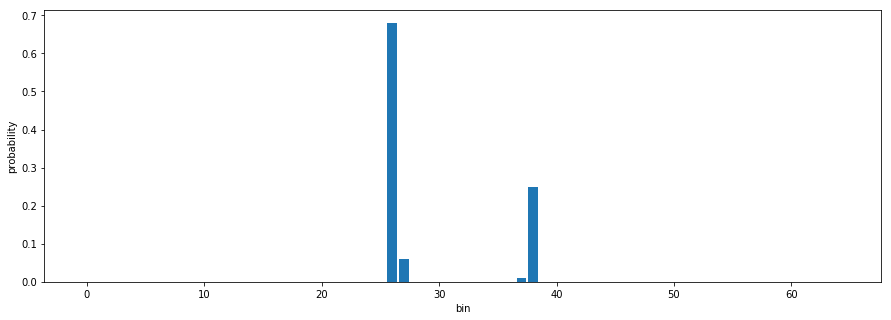

Predicted:


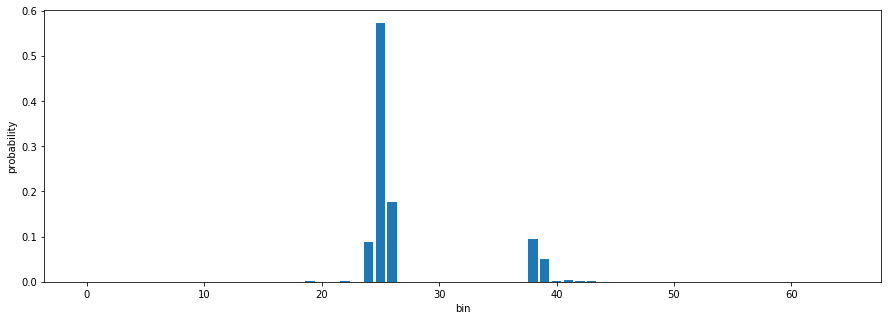

In [19]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

print("Label:")
plt.figure(figsize=(15,5))
plt.bar(np.arange(65), y_test.values[n],align='center')
plt.ylabel('probability')
plt.xlabel('bin')
plt.show()

print("Predicted:")
plt.figure(figsize=(15,5))
plt.bar(np.arange(65),predictions,align='center')
plt.ylabel('probability')
plt.xlabel('bin')
plt.show()